# Guía 1 - Ejercicio 3 

## Import de funciones y lectura de la imagen

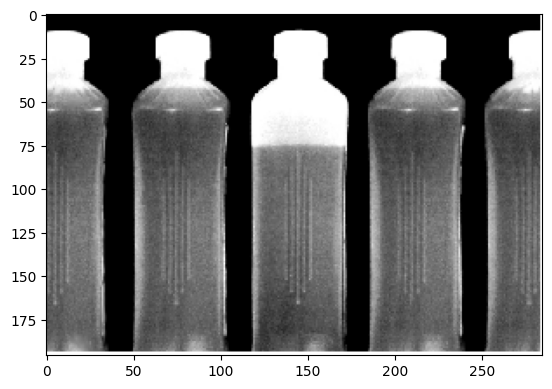

In [22]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

imagen = cv.imread('Imagenes_Ej/botellas.tif')


plt.imshow(imagen)
plt.show()


### Obtención de la posición de la botella
Se tomó como referencia para conocer el estado de llenado de la botella al perfil de intensidad correspondiente a la altura y=48. A partir de esto, obtuvimos los valores de intensidad de la imagen. Recorremos el perfil de intensidad hasta encontrar un valor de píxel cercano a blanco (mayor a 250), aumentamos el contador (en caso de ser la primera vez nos lo guardamos como primer punto del rectángulo) y seguimos. En el momento que dejemos de encontrarnos con un píxel blanco pasaremos a la siguiente estructura condicional, donde si el contador es mayor a la tolerancia quiere decir que venimos de una botella, por lo tanto, entramos y tomamos el siguiente punto del rectángulo, obteniendo así el rectángulo que encuadra la botella.
### Obtencíon del porcentaje de llenado
Primero encontramos el punto medio de la botella sobre la primera fila de llenado (línea de referencia). Nos empezamos a mover sobre esta columan en sentido fila ascendente (arriba hacia abajo) hasta encontrar un valor de intensidad oscuro (menor a 150). Esto quiere decir que llegamos al líquido de la botella y con esto tenemos el total de cantidad no llenada, dividiéndola por el total obtenemos el porcentaje de llenado. 

In [23]:
linea_de_referencia = 48

tolerancia = 15
columna = 0
cont = 0
punto1_rectangulo = None  
punto2_rectangulo = None
perfil_de_intensidad = imagen[linea_de_referencia, :, 1]

while columna < len(perfil_de_intensidad):

    if perfil_de_intensidad[columna] >= 250: #Si es blanco
    
        cont += 1
    
        if cont == 1:
            punto1_rectangulo = (columna, linea_de_referencia)  

    elif cont > tolerancia:

        fila_final = 190
        punto2_rectangulo = (columna, fila_final)  

        # Dibujamos réctangulo donde está la botella
        if punto1_rectangulo is not None and punto2_rectangulo is not None: #Validación
            cv.rectangle(imagen, punto1_rectangulo, punto2_rectangulo, (0, 255, 0), 2)

        # Obtención del porcentaje de llenado
        mitad_botella = punto1_rectangulo[0] + int((punto2_rectangulo[0]-punto1_rectangulo[0])/2)
        punto_medio = (mitad_botella,punto1_rectangulo[1])

        perfil_de_intensidad = imagen[punto_medio[1]:, punto_medio[0], 1]
        fila = 0


        while fila < len(perfil_de_intensidad):
            if perfil_de_intensidad[fila] <= 150:
                capacidad = (len(perfil_de_intensidad[fila:])*100)/len(perfil_de_intensidad)
                break
            fila += 1

        print(f"Tiene un llenado del: {capacidad:.1f} %")
        cont = 0
        punto1_rectangulo = None  
        punto2_rectangulo = None
    else:
        punto1_rectangulo = None  
        punto2_rectangulo = None
        cont = 0
    columna += 1



cv.imshow("botella", imagen)
cv.waitKey(0)
cv.destroyAllWindows()



Tiene un llenado del: 80.4 %
